In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')

Text(0, 0.5, 'y')

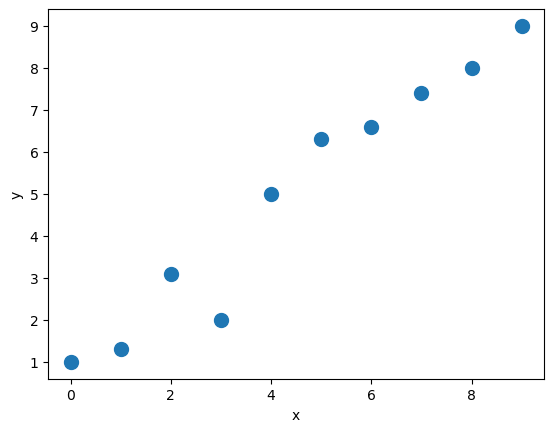

In [3]:
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

In [4]:
from torch.utils.data import TensorDataset, DataLoader
import torch

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [5]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
    return xb @ weight + bias

In [6]:
def loss_fn(input, target):
    return (input-target).pow(2).mean()

In [7]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs==0:
        print(f'Эnoxa {epoch} Потеря {loss.item():.4f}')

Эnoxa 0 Потеря 41.2725
Эnoxa 10 Потеря 24.4285
Эnoxa 20 Потеря 1.0575
Эnoxa 30 Потеря 15.1630
Эnoxa 40 Потеря 12.5989
Эnoxa 50 Потеря 5.0840
Эnoxa 60 Потеря 0.7865
Эnoxa 70 Потеря 3.7489
Эnoxa 80 Потеря 2.4036
Эnoxa 90 Потеря 0.4430
Эnoxa 100 Потеря 1.1155
Эnoxa 110 Потеря 1.3195
Эnoxa 120 Потеря 0.1064
Эnoxa 130 Потеря 0.5676
Эnoxa 140 Потеря 0.2216
Эnoxa 150 Потеря 1.4862
Эnoxa 160 Потеря 0.0483
Эnoxa 170 Потеря 0.0061
Эnoxa 180 Потеря 0.0016
Эnoxa 190 Потеря 0.0294


Окончательные параметры: 2.645277738571167 4.715577602386475


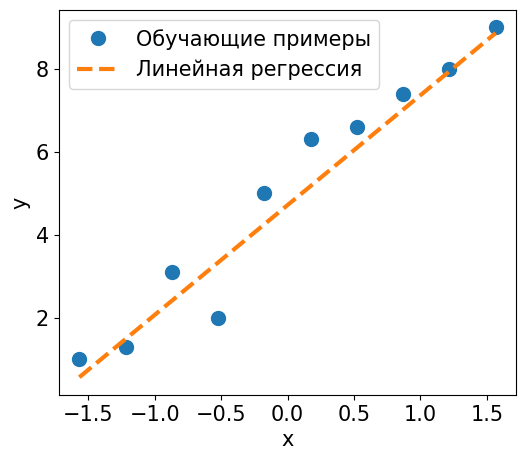

In [8]:
print ('Окончательные параметры:', weight.item(), bias.item())
X_test = np.linspace(0, 9, num=100, dtype='float32') .reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax= fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Oбyчaющие примеры', 'Линейная регрессия'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [9]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print((f' Эпохи {epoch} Потери { loss.item():.4f}'))

 Эпохи 0 Потери 24.6684
 Эпохи 10 Потери 29.1377
 Эпохи 20 Потери 20.9207
 Эпохи 30 Потери 0.1257
 Эпохи 40 Потери 12.4922
 Эпохи 50 Потери 1.7845
 Эпохи 60 Потери 7.6425
 Эпохи 70 Потери 2.5606
 Эпохи 80 Потери 0.0157
 Эпохи 90 Потери 0.7548
 Эпохи 100 Потери 0.8412
 Эпохи 110 Потери 0.4923
 Эпохи 120 Потери 0.0823
 Эпохи 130 Потери 0.0794
 Эпохи 140 Потери 0.0891
 Эпохи 150 Потери 0.0973
 Эпохи 160 Потери 0.1043
 Эпохи 170 Потери 0.1103
 Эпохи 180 Потери 0.0009
 Эпохи 190 Потери 0.0764


In [11]:
print('Окончательные параметры: ', model.weight.item(), model.bias.item())

Окончательные параметры:  2.6496422290802 4.87706995010376


In [12]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=num_epochs, alpha=learning_rate)
sgdr.fit(X_train_norm, y_train)

SGDRegressor(alpha=0.001, max_iter=200)

In [13]:
sgdr.coef_, sgdr.intercept_

(array([2.5963533]), array([4.77241346]))

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [16]:
class Model(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        return X

In [17]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [18]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = torch.tensor(model(x_batch))
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch) .float()
        accuracy_hist[epoch] += is_correct.sum()
        loss_hist[epoch] /= len(train_dl.dataset)
        accuracy_hist[epoch] /= len(train_dl.dataset)

ValueError: Expected input batch_size (150) to match target batch_size (2).